# Pandas (Part 2)


**Reference for pandas**
1. [Pandas official Document](https://pandas.pydata.org/docs/reference/index.html)
1. [Python Data Science Handbook
](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html)

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Đọc dữ liệu từ file vào dataframe

pd.read_csv

Dữ liệu: [MovieLens 100K Dataset](https://files.grouplens.org/datasets/movielens/ml-latest-small.zip). Có tất cả 4 file csv, trong phần demo bên dưới chỉ dùng 2 file.

Theo [file mô tả dữ liệu](https://files.grouplens.org/datasets/movielens/ml-latest-small-README.html):
>This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.
>
>Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.

In [222]:
# Đọc dữ liệu từ file movies.csv vào dataframe movies_df
# Đọc dữ liệu từ file ratings.csv vào dataframe ratings_df
# Mình đặt các file csv trong thư mục Data/ml-latest-small
movies_df = pd.read_csv('Data/ml-latest-small/movies.csv')
ratings_df = pd.read_csv('Data/ml-latest-small/ratings.csv')

## Xem nhanh một vài dòng của dataframe

- df.head
- df.tail
- df.sample

In [223]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [224]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Xem các thông tin của dataframe

- len(df)
- df.shape
- df.index
- df.columns
- df.dtypes
- df.values (vì tương lai, nên thay bằng df.to_numpy)
- df.info

## Truy xuất dữ liệu ở dataframe

- df.iloc[r, c]
- df.loc[r, c]
- df[...]

## Thay đổi dữ liệu ở dataframe

- df.iloc[...] = ...
- df.loc[...] = ...
- df[...] = ...

## Thay đổi tên dòng/cột ở dataframe

- df.rename
- df.columns = ...
- df.index = ...
- df.set_index, df.reset_index

## Thay đổi kiểu dữ liệu của cột ở dataframe

- s.astype
- pd.to_datetime

## Thực hiện thao tác với cột có kiểu dữ liệu dạng thời gian ở dataframe
s.dt.

## Thực hiện thao tác với cột có kiểu dữ liệu dạng chuỗi ở dataframe

s.str.

## Thêm/xóa dòng/cột ở dataframe

- pd.concat, df[tên cột] = ...
- df.drop

## Xử lý giá trị thiếu ở dataframe

### NaN (Missing numerical data)
Để biểu diễn giá trị bị thiếu trong pandas: Dùng `NaN` (*Not a Number*)\
Đây là một giá trị của kiểu *floating-point*, theo chuẩn IEEE.\
Tham khảo thêm [Floating point NaN](https://en.wikipedia.org/wiki/NaN)

In [225]:
vals = np.array([1, np.nan, 3, 4])
vals.dtype

dtype('float64')

In [226]:
# Phép toán với NaN sẽ tạo thành NaN
vals*0

array([ 0., nan,  0.,  0.])

In [227]:
vals.sum(), vals.min(), vals.max()

(nan, nan, nan)

In [228]:
# Numpy cung cấp hàm để tính toán trên dữ liệu có NaN
np.nansum(vals), np.nanmin(vals), np.nanmax(vals)

(8.0, 1.0, 4.0)

Lưu ý rằng `NaN` là một giá trị floating-point đặc biệt. Không có giá trị `NaN` tương ứng cho interger, string hay kiểu dữ liệu khác.

### NaN và None Trong pandas
NaN và None mang cùng nghĩa trong pandas

In [229]:
# None sẽ được cast thành NaN
x = pd.Series(["a", None, "b", np.nan])
pd.isnull(x)

0    False
1     True
2    False
3     True
dtype: bool

In [230]:
# Mảng số nguyên sẽ được up-cast thành số thực nếu có NaN
# Mảng số nguyên sẽ được up-cast thành số thực nếu có NaN
x = pd.Series(range(4), dtype=int)
x

0    0
1    1
2    2
3    3
dtype: int64

In [231]:
x[0] = np.NaN
x

0    NaN
1    1.0
2    2.0
3    3.0
dtype: float64

Quy luật up-cast khi dữ liệu có giá trị bị thiếu
|Typeclass     | Conversion When Storing NAs | NA Sentinel Value      |
|--------------|-----------------------------|------------------------|
| ``floating`` | No change                   | ``np.nan``             |
| ``object``   | No change                   | ``None`` or ``np.nan`` |
| ``integer``  | Cast to ``float64``         | ``np.nan``             |
| ``boolean``  | Cast to ``object``          | ``None`` or ``np.nan`` |

### Thao tác trên giá trị null
- ``isnull()``: Tạo ra mảng boolean tại các vị trí giá trị bị thiếu
- ``notnull()``: Ngược với ``isnull()``
- ``dropna()``: Trả về version đã lọc giá trị na
- ``fillna()``: Trả về version với các giá trị bị thiếu được filled
- `bfill()` : fill backward
- `ffill()` : fill forward

In [232]:
data = pd.Series([1, np.nan, 'hello', None])
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [233]:
data[pd.notna(data)]

0        1
2    hello
dtype: object

In [234]:
df = pd.DataFrame({'col1': [1, 1, np.nan], 
                   'col2': [2, np.nan, np.nan],
                   'col3': [np.nan, np.nan, np.nan]})
df

,col1,col2,col3
0,1.0,2.0,NaN
1,1.0,NaN,NaN
2,NaN,NaN,NaN


Một cách xử lý giá trị thiếu: điền giá trị thiếu bằng một giá trị nào đó.

In [235]:
df.fillna(-1)

,col1,col2,col3
0,1.0,2.0,-1.0
1,1.0,-1.0,-1.0
2,-1.0,-1.0,-1.0


Một cách khác để xử lý giá trị thiếu: bỏ các dòng (hoặc các cột) liên quan.

In [236]:
# Bỏ đi những dòng mà có ít nhất một cột bị thiếu giá trị
df.dropna(axis=0)

,col1,col2,col3


In [237]:
# Bỏ đi những dòng mà tất cả các cột đều bị thiếu giá trị
df.dropna(axis=1)

""
0
1
2


In [238]:
# Bỏ đi những dòng mà col2 và col3 đều bị thiếu giá trị
df.dropna(how='all', subset=['col2', 'col3'], axis=0)

,col1,col2,col3
0,1.0,2.0,NaN


## Kết hợp dữ liệu từ nhiều dataframe

**Nhắc lại**: Concatenation các mảng Numpy

In [239]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [240]:
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis=1)


array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

## Simple Concatenation with ``pd.concat``

In [241]:
df1 = pd.DataFrame({'c1': [1, 1, 1], 'c2': [2, 22, 222]})
df1

,c1,c2
0,1,2
1,1,22
2,1,222


In [242]:
df2 = pd.DataFrame({'c3': [3, 3, 3, 3], 'c4': [22, 222, 2222, 22222]})
df2

,c3,c4
0,3,22
1,3,222
2,3,2222
3,3,22222


In [243]:
pd.concat([df1,df2])

,c1,c2,c3,c4
0,1.0,2.0,NaN,NaN
1,1.0,22.0,NaN,NaN
2,1.0,222.0,NaN,NaN
0,NaN,NaN,3.0,22.0
1,NaN,NaN,3.0,222.0
2,NaN,NaN,3.0,2222.0
3,NaN,NaN,3.0,22222.0


In [244]:
pd.concat([df1,df2],axis = 1)

,c1,c2,c3,c4
0,1.0,2.0,3,22
1,1.0,22.0,3,222
2,1.0,222.0,3,2222
3,NaN,NaN,3,22222


In [245]:
pd.concat([df1,df2],ignore_index=True)

,c1,c2,c3,c4
0,1.0,2.0,NaN,NaN
1,1.0,22.0,NaN,NaN
2,1.0,222.0,NaN,NaN
3,NaN,NaN,3.0,22.0
4,NaN,NaN,3.0,222.0
5,NaN,NaN,3.0,2222.0
6,NaN,NaN,3.0,22222.0


### Merge

In [246]:
df1 = pd.DataFrame({'c1': [1, 1, 1], 'c2': [2, 22, 222]})
df1

,c1,c2
0,1,2
1,1,22
2,1,222


In [247]:
df2 = pd.DataFrame({'c3': [3, 3, 3, 3], 'c2': [22, 222, 2222, 22222]})
df2

,c3,c2
0,3,22
1,3,222
2,3,2222
3,3,22222


Merge df1và df2 lại dựa vào cột c2

In [248]:
df1.merge(df2, how='inner', indicator=True)

,c1,c2,c3,_merge
0,1,22,3,both
1,1,222,3,both


In [249]:
df1.merge(df2, how='outer', indicator=True)

,c1,c2,c3,_merge
0,1.0,2,NaN,left_only
1,1.0,22,3.0,both
2,1.0,222,3.0,both
3,NaN,2222,3.0,right_only
4,NaN,22222,3.0,right_only


In [250]:
df1.merge(df2, how='left', indicator=True)

,c1,c2,c3,_merge
0,1,2,NaN,left_only
1,1,22,3.0,both
2,1,222,3.0,both


In [251]:
df1.merge(df2, how='right', indicator=True)

,c1,c2,c3,_merge
0,1.0,22,3,both
1,1.0,222,3,both
2,NaN,2222,3,right_only
3,NaN,22222,3,right_only


In [252]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [253]:
df2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [254]:
df3 = df1.merge(df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [255]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
df4

,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


In [256]:
df

,col1,col2,col3
0,1.0,2.0,NaN
1,1.0,NaN,NaN
2,NaN,NaN,NaN


In [257]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
df5

,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization


## Gom nhóm và tính toán trong mỗi nhóm

![](figures/03.08-split-apply-combine.png)

In [258]:
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
babynames_df = pd.read_csv('Data/STATE.CA.TXT',header=None,names=field_names)
babynames_df

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134
...,...,...,...,...,...
407423,CA,M,2022,Zayvier,5
407424,CA,M,2022,Zia,5
407425,CA,M,2022,Zora,5
407426,CA,M,2022,Zuriel,5


In [259]:
# Tính tổng số trẻ được sinh ra trong từng năm


In [260]:
# Năm đầu tiên mỗi tên xuất hiện


Cho biết mỗi movie (dùng title để biểu diễn movie) có bao nhiêu người đánh giá và điểm TB là bao nhiêu?

Các bước:
1. Từ ratings_df, merge với movies_df để có thông tin về title của movie
2. Từ kết quả ở trên, tiến hành gom nhóm các dòng theo title; với mỗi nhóm, tính số người đánh giá (số dòng) và điểm TB

Vấn đề: có thể có các movie bị trùng title!

Điều chỉnh lại các bước như sau:
1. Từ ratings_df, tiến hành gom nhóm các dòng theo movieId; với mỗi nhóm, tính số người đánh giá (số dòng) và điểm TB
2. Từ kết quả ở trên, merge với movies_df để có thông tin về title của movie

In [261]:
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [262]:
df = ratings_df
df = df.groupby('movieId')['rating'].agg(['mean', 'size'])

df2 = movies_df[['movieId', 'title']]
df = df.merge(df2, on='movieId')
df.sort_values('size', ascending=False).head(10)

,movieId,mean,size,title
314,356,4.164134,329,Forrest Gump (1994)
277,318,4.429022,317,"Shawshank Redemption, The (1994)"
257,296,4.197068,307,Pulp Fiction (1994)
510,593,4.161290,279,"Silence of the Lambs, The (1991)"
1938,2571,4.192446,278,"Matrix, The (1999)"
224,260,4.231076,251,Star Wars: Episode IV - A New Hope (1977)
418,480,3.750000,238,Jurassic Park (1993)
97,110,4.031646,237,Braveheart (1995)
507,589,3.970982,224,Terminator 2: Judgment Day (1991)
461,527,4.225000,220,Schindler's List (1993)


Với các movie được sản xuất vào năm 1999, cho biết mỗi movie (dùng title để biểu diễn movie) có bao nhiêu người đánh giá và điểm TB là bao nhiêu?

In [263]:
movies_df['title'].str.extract(r'\((\d{4})\)')

,0
0,1995
1,1995
2,1995
3,1995
4,1995
...,...
9737,2017
9738,2017
9739,2017
9740,2018


In [264]:
df = movies_df['title'].str.extract(r'\((\d{4})\)')
df.columns = ['Year']

movies_with_year_df = pd.concat([movies_df, df], axis=1)
movies_with_year_df.head()

,movieId,title,genres,Year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [265]:
df = ratings_df
df = ratings_df.merge(movies_with_year_df[['movieId', 'Year']])
df = df[df['Year'] == '1999']

df = df.groupby('movieId')['rating'].agg(['mean', 'size'])

df = df.merge(movies_df[['movieId', 'title']], on='movieId')
df = df.sort_values('size', ascending=False)
df.head(10)

,movieId,mean,size,title
32,2571,4.192446,278,"Matrix, The (1999)"
123,2959,4.272936,218,Fight Club (1999)
103,2858,4.056373,204,American Beauty (1999)
82,2762,3.893855,179,"Sixth Sense, The (1999)"
51,2628,3.107143,140,Star Wars: Episode I - The Phantom Menace (1999)
59,2683,3.198347,121,Austin Powers: The Spy Who Shagged Me (1999)
162,3147,4.148649,111,"Green Mile, The (1999)"
67,2706,3.378641,103,American Pie (1999)
136,2997,3.954545,99,Being John Malkovich (1999)
154,3114,3.860825,97,Toy Story 2 (1999)


## Thay đổi shape của dataframe

Với mỗi năm sản xuất, movie nào là movie của năm (được nhiều người đánh giá nhất)?

In [266]:
df = ratings_df
df = df.merge(movies_with_year_df[['movieId', 'Year']])
s = df.groupby(['Year', 'movieId']).size()
s

Year  movieId
1902  32898      5
1903  49389      2
1908  140541     1
1915  7065       1
1916  7243       1
                ..
2018  189333     2
      189381     1
      189713     1
      190183     1
      193587     1
Length: 9711, dtype: int64

In [267]:
# Chuyển các giá trị của cột index chỉ số 1 (movieId) 
# lên thành các cột!
# Sau khi chuyển: thông tin về số lượng người đánh giá của các movie
# thuộc cùng một năm sản xuất đã nằm trên một dòng! --> sẵn sàng để 
# tìm ra movie được nhiều người đánh giá nhất của mỗi năm
# (Hình dung: series cao và gầy --> dataframe lùn và mập)
s.unstack(1)

movieId,32898,49389,140541,7065,7243,62383,72921,102747,8511,3132,...,188751,188797,188833,189043,189111,189333,189381,189713,190183,193587
Year,,,,,,,,,,,,,,,,,,,,,
1902,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1908,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1915,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1916,NaN,NaN,NaN,NaN,1.0,2.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [268]:
df = s.unstack(1)
df = df.idxmax(1).to_frame()
df.columns = ["movieId"]
df = df.reset_index()
df = df.merge(movies_df[['movieId', 'title']])
df

,Year,movieId,title
0,1902,32898,"Trip to the Moon, A (Voyage dans la lune, Le) ..."
1,1903,49389,The Great Train Robbery (1903)
2,1908,140541,The Electric Hotel (1908)
3,1915,7065,"Birth of a Nation, The (1915)"
4,1916,62383,"20,000 Leagues Under the Sea (1916)"
...,...,...,...
101,2014,109487,Interstellar (2014)
102,2015,134130,The Martian (2015)
103,2016,122904,Deadpool (2016)
104,2017,122918,Guardians of the Galaxy 2 (2017)


### Example
([Nguồn](https://github.com/brandon-rhodes/pycon-pandas-tutorial))

In [269]:
# Dữ liệu ở file sales1 nhìn chung là đã ngăn nắp
# Đơn vị tiền tệ ở đây là USD
sale1_df = pd.read_csv('Data/sales1.csv')
sale1_df

,Book title,Number sold,Sales price,Royalty paid
0,The Bricklayer’s Bible,8,2.99,0.55
1,Swimrand,2,1.99,0.35
2,Pining For The Fisheries of Yore,28,2.99,0.55
3,The Duck Goes Here,34,2.99,0.55
4,The Tower Commission Report,4,11.50,4.25


In [270]:
# Dữ liệu ở file sale2 rất loạn
# 3 cột "Units sold", "List price", "Royalty" lần lượt tương ứng 
# với 3 cột "Number sold", "Sales price", "Royalty paid" ở sale1
sale2_df = pd.read_csv('Data/sales2.csv')
sale2_df.fillna('')

,Title,Units sold,List price,Royalty
0,,,,
1,Sales report for Q4,,,
2,E-Book Reader US Store,,,
3,Pining for the Fisheries of Yore,80.0,3.5,14.98
4,Swimrand,1.0,2.99,0.14
5,The Bricklayer's Bible,17.0,3.5,5.15
6,The Duck Goes Here,34.0,2.99,5.78
7,The Tower Commission Report,4.0,9.5,6.2
8,US royalties (USD),,,32.25
9,,,,


*Yêu cầu: gộp dữ liệu ở sale1 và sale2 lại thành một dataframe
 với các cột "Book title", "Number sold", "Sales price", "Royalty paid", "Currency" (đơn vị tiền tệ); mỗi dòng ứng với thông tin của một quyển sách, không có dòng "lạc loài".*
 
 Gợi ý:
 - Bạn có thể sẽ cần dùng đến tham số `method` trong phương thức `fillna`.
 - Kết quả sau cùng sẽ có 15 dòng.

In [272]:
df2 = sale2_df
s = df2['Title'].str.extract(r'\((.+)\)').bfill()
df2['Currency'] = s
df2 = df2.dropna()
df2.columns = df1.columns
df2

,Book title,Number sold,Sales price,Royalty paid,Currency
3,Pining for the Fisheries of Yore,80.0,3.50,14.98,USD
4,Swimrand,1.0,2.99,0.14,USD
5,The Bricklayer's Bible,17.0,3.50,5.15,USD
6,The Duck Goes Here,34.0,2.99,5.78,USD
7,The Tower Commission Report,4.0,9.50,6.20,USD
13,Pining for the Fisheries of Yore,47.0,2.99,11.98,GBP
14,The Bricklayer's Bible,17.0,2.99,3.50,GBP
15,The Tower Commission Report,4.0,6.50,4.80,GBP
21,Swimrand,8.0,1.99,0.88,EUR
22,The Duck Goes Here,12.0,1.99,1.50,EUR


In [273]:
pd.merge(df1, df2, on='Book title')

,Book title,Number sold_x,Sales price_x,Royalty paid_x,Currency_x,Number sold_y,Sales price_y,Royalty paid_y,Currency_y
0,Swimrand,2,1.99,0.35,USD,1.0,2.99,0.14,USD
1,Swimrand,2,1.99,0.35,USD,8.0,1.99,0.88,EUR
2,The Duck Goes Here,34,2.99,0.55,USD,34.0,2.99,5.78,USD
3,The Duck Goes Here,34,2.99,0.55,USD,12.0,1.99,1.50,EUR
4,The Tower Commission Report,4,11.50,4.25,USD,4.0,9.50,6.20,USD
5,The Tower Commission Report,4,11.50,4.25,USD,4.0,6.50,4.80,GBP


In [274]:
temp = pd.concat([df1, df2], axis=0).reset_index(drop=True)
temp

,Book title,Number sold,Sales price,Royalty paid,Currency
0,The Bricklayer’s Bible,8.0,2.99,0.55,USD
1,Swimrand,2.0,1.99,0.35,USD
2,Pining For The Fisheries of Yore,28.0,2.99,0.55,USD
3,The Duck Goes Here,34.0,2.99,0.55,USD
4,The Tower Commission Report,4.0,11.50,4.25,USD
5,Pining for the Fisheries of Yore,80.0,3.50,14.98,USD
6,Swimrand,1.0,2.99,0.14,USD
7,The Bricklayer's Bible,17.0,3.50,5.15,USD
8,The Duck Goes Here,34.0,2.99,5.78,USD
9,The Tower Commission Report,4.0,9.50,6.20,USD


## Xem phân bố các giá trị của mỗi cột ở dataframe

- df.agg([col_function1, col_function2...])
- s.plot.hist
- s.value_counts().plot.barh

## Sắp xếp dữ liệu ở dataframe

- df.sort_values
- df.sort_index

## Thực hiện thao tác trên dataframe mà không được định nghĩa sẵn

In [275]:
df = movies_df[['title', 'genres']]
df

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy
...,...,...
9737,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,Flint (2017),Drama
9740,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


Tính chiều dài của mỗi chuỗi trong dataframe df.

In [276]:
# Cách 1: áp dụng một hàm nào đó lên từng cột của dataframe
df.apply(lambda s: s.str.len(), axis=0)

,title,genres
0,16,43
1,14,26
2,23,14
3,24,20
4,34,6
...,...,...
9737,41,31
9738,28,24
9739,12,5
9740,35,16


In [279]:
# Cách 2: áp dụng một hàm nào đó lên từng phần tử của dataframe
df.map(len)

AttributeError: 'DataFrame' object has no attribute 'map'

Để ý sự khác biệt khi gọi phương thức apply từ dataframe và khi gọi từ series.

In [283]:
df.apply(len)

title     9742
genres    9742
dtype: int64

In [281]:
df['title'].apply(len)

0       16
1       14
2       23
3       24
4       34
        ..
9737    41
9738    28
9739    12
9740    35
9741    35
Name: title, Length: 9742, dtype: int64

## Xem mối quan hệ giữa 2 cột numeric trong dataframe

([Nguồn tham khảo](https://inferentialthinking.com/chapters/15/1/Correlation.html))

### Line plot

Dùng để trực quan hóa mối quan hệ giữa 2 cột numeric, trong đó một cột thường là datetime

In [284]:
df = pd.DataFrame({'date': pd.date_range(start='1/1/2021', periods=8),
                   'temperature': np.random.randint(20, 35, size=8)})
df

,date,temperature
0,2021-01-01,31
1,2021-01-02,25
2,2021-01-03,29
3,2021-01-04,20
4,2021-01-05,28
5,2021-01-06,27
6,2021-01-07,30
7,2021-01-08,29


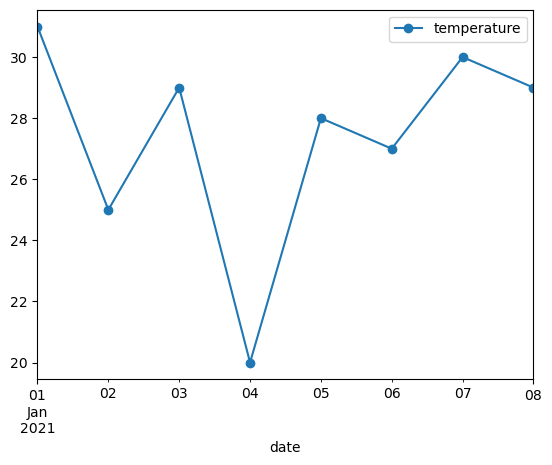

In [285]:
df.plot.line(x='date', y='temperature', marker='o');

### Scatter plot

Dùng để trực quan hóa mối quan hệ của 2 cột numeric nói chung; giống line plot nhưng không nối các điểm lại với nhau

In [286]:
cars_df = pd.read_csv('Data/Cars.csv')
cars_df.head()

,vehicle,year,msrp,acceleration,mpg,class
0,Prius (1st Gen),1997,24509.74,7.46,41.26,Compact
1,Tino,2000,35354.97,8.20,54.10,Compact
2,Prius (2nd Gen),2000,26832.25,7.97,45.23,Compact
3,Insight,2000,18936.41,9.52,53.00,Two Seater
4,Civic (1st Gen),2001,25833.38,7.04,47.04,Compact


Theo mô tả dữ liệu ở https://www.inferentialthinking.com/chapters/15/1/Correlation.html:

- "vehicle": model of the car
- "year": year of manufacture
- "msrp": manufacturer's suggested retail price in 2013 dollars
- "acceleration": acceleration rate in km per hour per second
- "mpg": fuel econonmy in miles per gallon
- "class": the model's class.

In [287]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   vehicle       153 non-null    object 
 1   year          153 non-null    int64  
 2   msrp          153 non-null    float64
 3   acceleration  153 non-null    float64
 4   mpg           153 non-null    float64
 5   class         153 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 7.3+ KB


In [289]:
# Đổi tên cột "msrp" thành "price" cho dễ nhớ
cars_df = cars_df.rename(columns={'msrp': 'price'})
cars_df

,vehicle,year,price,acceleration,mpg,class
0,Prius (1st Gen),1997,24509.74,7.46,41.26,Compact
1,Tino,2000,35354.97,8.20,54.10,Compact
2,Prius (2nd Gen),2000,26832.25,7.97,45.23,Compact
3,Insight,2000,18936.41,9.52,53.00,Two Seater
4,Civic (1st Gen),2001,25833.38,7.04,47.04,Compact
...,...,...,...,...,...,...
148,S400,2013,92350.00,13.89,21.00,Large
149,Prius Plug-in,2013,32000.00,9.17,50.00,Midsize
150,C-Max Energi Plug-in,2013,32950.00,11.76,43.00,Midsize
151,Fusion Energi Plug-in,2013,38700.00,11.76,43.00,Midsize


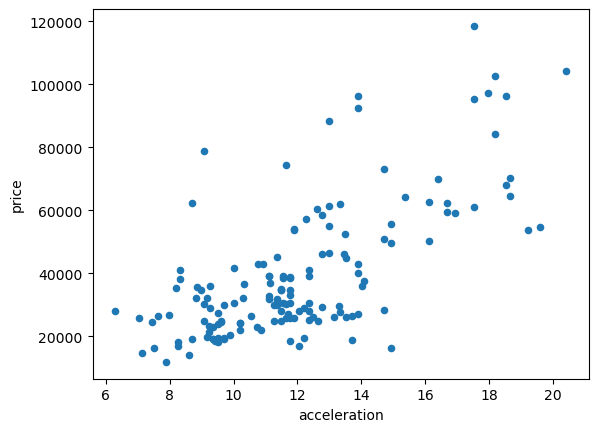

In [290]:
# "acceleration" & "price" có quan hệ gì với nhau?
cars_df.plot.scatter(x='acceleration', y='price');

<Axes: xlabel='mpg', ylabel='price'>

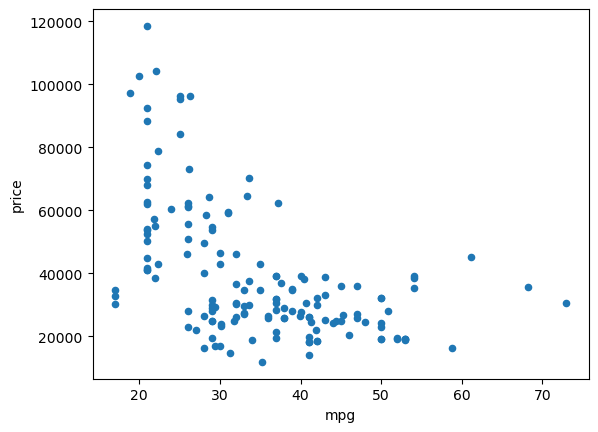

In [291]:
# "mpg" & "price" có quan hệ gì với nhau?
cars_df.plot.scatter(x = 'mpg', y = 'price')

In [ ]:
# "mpg" & "price" của class SUV có quan hệ gì với nhau?


In [ ]:
# "acceleration" & "price" của class SUV có quan hệ gì với nhau?


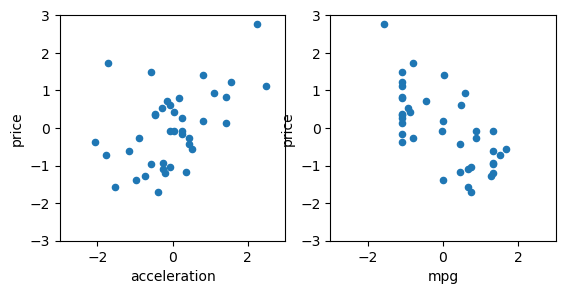

In [292]:
# Trong class SUV, so sánh 
# mức độ quan hệ tuyến tính giữa "acceleration" & "price"
# với mức độ quan hệ tuyến tính giữa "mpg" & "price"
# Để có thể so sánh bằng cách trực quan hóa thì ta cần
# chuẩn hóa các cột về đơn vị chuẩn bằng cách lấy mỗi
# cột trừ đi mean của cột rồi chia cho std của cột

# Trong class SUV, so sánh 
# mức độ quan hệ tuyến tính giữa "acceleration" & "price"
# với mức độ quan hệ tuyến tính giữa "mpg" & "price"
# Để có thể so sánh bằng cách trực quan hóa thì ta cần
# chuẩn hóa các cột về đơn vị chuẩn bằng cách lấy mỗi
# cột trừ đi mean của cột rồi chia cho std của cột

df = cars_df
df = df[df['class'] == 'SUV']
df = df[['acceleration', 'mpg', 'price']]
df = (df - df.mean(axis=0)) / df.std(axis=0, ddof=0) # Lưu ý ddof!

fig, axs = plt.subplots(1, 2)
axs[0].set(xlim=(-3, 3), ylim=(-3, 3), aspect=1)
axs[1].set(xlim=(-3, 3), ylim=(-3, 3), aspect=1)
df.plot.scatter('acceleration', 'price', ax=axs[0])
df.plot.scatter('mpg', 'price', ax=axs[1]);

### Correlation coefficient (r)

**Correlation coefficient (r):** giá trị cho biết mức độ quan hệ TUYẾN TÍNH giữa 2 biến.
- r thuộc [-1, 1].
- |r| càng lớn nghĩa là mức độ quan hệ tuyến tính càng cao.
- r > 0 nghĩa là đồng biến, r < 0 nghĩa là nghịch biến.

Cách tính: r = trung bình của tích các giá trị tương ứng của 2 biến trong đơn vị chuẩn.

1.0

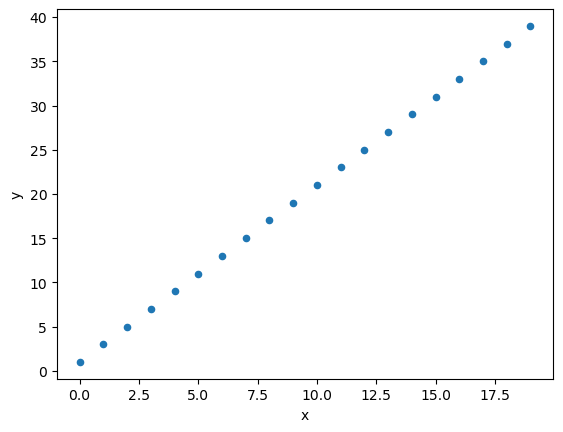

In [297]:
# r - ví dụ 1
# r - ví dụ 1
x = np.arange(20)
y = 2 * x + 1
df = pd.DataFrame({'x': x, 'y': y})
df.plot.scatter('x', 'y')
df = (df - df.mean(axis=0)) / df.std(axis=0, ddof=0)
df.prod(axis=1).mean()

0.010579561383459758

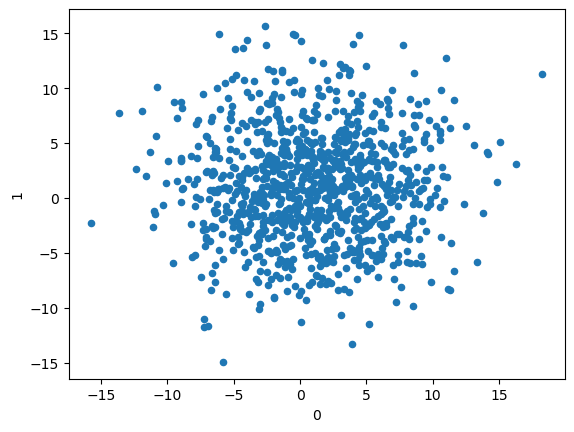

In [296]:
# r - ví dụ 2
xy = np.random.normal(loc=1, scale=5, size=(1000, 2))
df = pd.DataFrame(xy)
df.plot.scatter(0, 1)
df = (df - df.mean(axis=0)) / df.std(axis=0, ddof=0)
df.prod(axis=1).mean()

In [ ]:
# Trong class SUV, so sánh 
# mức độ quan hệ tuyến tính giữa "acceleration" & "price"
# với mức độ quan hệ tuyến tính giữa "mpg" & "price"

# Dùng r



In [ ]:
# Nếu r của 2 biến bằng 0
# thì có chắc là 2 biến không có quan hệ gì với nhau?


1.0

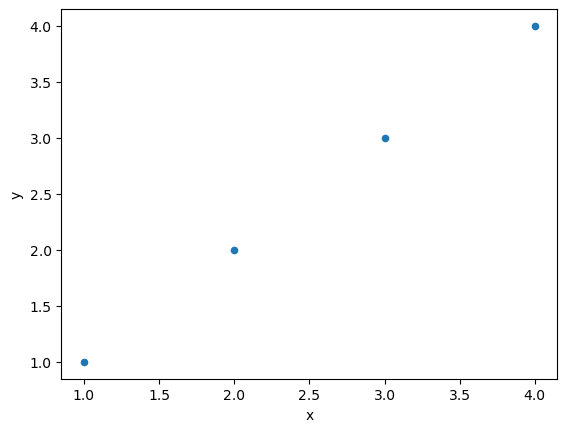

In [299]:
# r có bị ảnh hưởng bởi outlier?
x = np.array([1, 2, 3, 4])
y = x
df = pd.DataFrame({'x': x, 'y': y})
df.plot.scatter('x', 'y')
df = (df - df.mean(axis=0)) / df.std(axis=0, ddof=0)
df.prod(axis=1).mean()

0.0

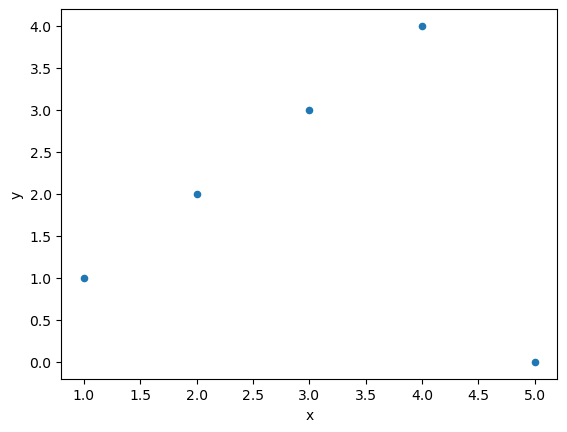

In [300]:
# r có bị ảnh hưởng bởi outlier?
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 3, 4, 0])
df = pd.DataFrame({'x': x, 'y': y})
df.plot.scatter('x', 'y')
df = (df - df.mean(axis=0)) / df.std(axis=0, ddof=0)
df.prod(axis=1).mean()

**Lưu ý**: 2 biến có quan hệ với nhau thì không chắc là quan hệ nhân-quả.

Ví dụ, người ta thấy khả năng đọc của các đứa trẻ có quan hệ đồng biến với kích thước giày của các đứa trẻ. Vậy cho trẻ mang giày có kích thước lớn có làm khả năng đọc của trẻ tăng lên?

Bạn có thể đọc [câu chuyện về John Snow trong những ngày bệnh dịch tả bùng phát](https://inferentialthinking.com/chapters/02/causality-and-experiments.html) để hiểu về cách để có thể kết luận một mối quan hệ là quan hệ nhân-quả.